# INFS 770 - Advanced Data Mining Application
## Assignment 5
### John Herbert

## T1: Document Libraries and Import Data

In [1]:
import networkx as nx
import pandas as pd
%matplotlib inline

from matplotlib import pyplot as plt
import community

In [2]:
# specify the file location
file_name = "Email-Enron.txt"

# read an edge list into a networkx graph
g = nx.read_edgelist(file_name, # file location
                     comments="#", # the character used to indicate the start of a comment
                     delimiter="\t", # the character that separates values in a line
                     create_using=nx.Graph() # create as undirected graph
                    )


## Q1: Print # of Edges and Density of Network

In [3]:
print(nx.info(g))
print('Density of network is',nx.density(g))

Name: 
Type: Graph
Number of nodes: 36692
Number of edges: 183831
Average degree:  10.0202
Density of network is 0.00027309755503535


## Q2

### Q2.1: What do the nodes and edges mean in this network? 

The nodes of this network are email addresses and the edges are if an email, *i* or *FromNodeID*, sent at least one email to *j*. This study only observes email communication with Enron email addresses and outside email addresses from the Enron netowrk act as sinks. 

### Q2.2: Are the edges weighted? 

No, the emails are not weighted. The edges only indicate whether or not an email was sent from an email *i* to *j*, not the number of emails sent between *i* and *j*.

## Q2.3 What does density of network mean? 

The density of a social network measures how many ties between actors, or in this case email addresses, compares to how many ties between actors or emails are possible. It is calculated as:

$Density = \frac{m}{n(n-1)/2}$

where $m$ is the total number of edges or cardinality and $n$ is the number of nodes

## Q3: Print and Interpret Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

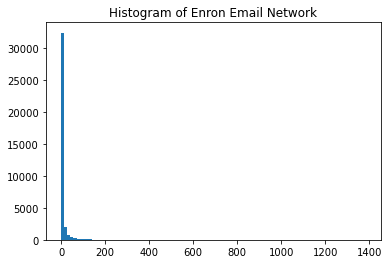

In [4]:
# compute node degrees of a graph
degree = nx.degree(g)
# convert it to pandas dataframe
df_degree = pd.DataFrame([x for x in degree], columns=["node", "degree"])
# sort nodes by degree in descending order
df_degree = df_degree.sort_values("degree", ascending=False)

plt.hist([y for (x, y) in degree], bins=100)
plt.title('Histogram of Enron Email Network')
plt.show

The histogram of the data shows a power law distribution, which means that the majority of the people in the network have a small number of connections, while there is a small number of people who have a large number of connections. This means that there are hubs where a few people have a large number of email correspondence with others while the majority have a small number of email correspondence with others. As we can see in the histogram, most people in the Enron network have only 1 connection to another email. 

## Q4: Connected Components in Network

In [5]:
# Using connected_components to determine number of components within the network
components = list(nx.connected_components(g))
print("Number of components in g:", len(components),'\n')
df_comp = pd.DataFrame()
df_comp["n_nodes"] = [len(c) for c in components]

print('The largest component in g:')
print(df_comp.loc[df_comp['n_nodes'].idxmax()],'\n')

# Creating a subgraph of the largest component within the network
for item in components:
    if len(item) == 33696:
        comp_L = g.subgraph(item)

print(nx.info(comp_L))

Number of components in g: 1065 

The largest component in g:
n_nodes    33696
Name: 0, dtype: int64 

Name: 
Type: Graph
Number of nodes: 33696
Number of edges: 180811
Average degree:  10.7319


According to the output above, there are 1,065 components within the network, component 0 has the largest number of nodes with 33,696 and has 180,811 edges.

## Q5: Components with 16 and 14 Nodes

<function matplotlib.pyplot.show(close=None, block=None)>

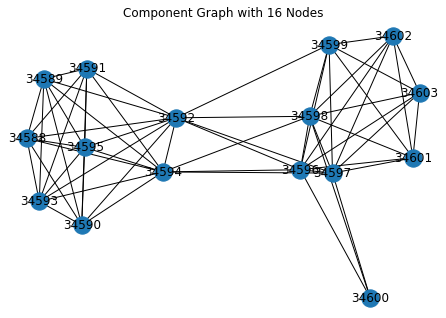

In [6]:
for item in components:
    if len(item) == 16:
        comp_A = g.subgraph(item)
        
nx.draw_spring(comp_A,with_labels=True)
plt.title("Component Graph with 16 Nodes")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

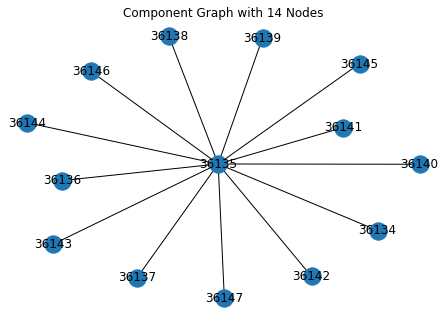

In [7]:
for item in components:
    if len(item) == 14:
        comp_B = g.subgraph(item)
        
nx.draw_spring(comp_B,with_labels=True)
plt.title("Component Graph with 14 Nodes")
plt.show

## Q6: Comparing Subgraphs comp_A to comp_B

In [8]:
print('Density of Component A',nx.density(comp_A))
print(nx.info(comp_A))

Density of Component A 0.49166666666666664
Name: 
Type: Graph
Number of nodes: 16
Number of edges: 59
Average degree:   7.3750


In [9]:
print('Density of Component B',nx.density(comp_B))
print(nx.info(comp_B))

Density of Component B 0.14285714285714285
Name: 
Type: Graph
Number of nodes: 14
Number of edges: 13
Average degree:   1.8571


Comparing the 2 subgraphs, we can see that component A has a much larger density and average degree. The density of component A shows it has more connections out of the potential connections available between the nodes than componenet B. We can see with component A, there are a lot more connections or edges between the nodes than with component B that only has connections to one node or person in the center. In addition, the degree is much higher for A rather than B wqhich show how many connections there are on average to other nodes.

## Q7: Louvain Modularity Method

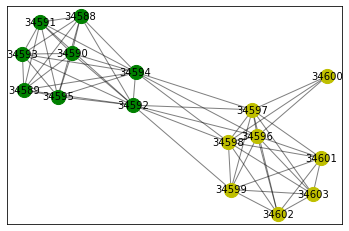

The number of communities for Component A is 2.0


In [10]:
# in order to run the louvain community detection algorithm, you need to Anaconda Prompt and type:
# pip install --upgrade --force-reinstall python-louvain (please right click Anaconda powershell prompt and select run as an administrator )

partition = community.best_partition(comp_A)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(comp_A)
count = 0
colors = ["g", "y"]
for com in set(partition.values()) :  
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(comp_A, pos, list_nodes, node_size = 200, node_color = colors[count])
    labels = {}    
    for node in list_nodes:
        #set the node name as the key and the label as its value 
        labels[node] = node # in our example, for each note (e.g, node "a"), we print the same label (e.g., a)
    #Now only add labels to the nodes you require (the hubs in my case)
    nx.draw_networkx_labels(g,pos,labels,font_size=10,font_color='k')
    count += 1
nx.draw_networkx_edges(comp_A, pos, alpha=0.5)
plt.show()
values = [(node, partition.get(node)) for node in comp_A.nodes()]
print("The number of communities for Component A is",size)

## Q8: Number of Cliques

In [11]:
len_cliq = []
for cliq in nx.find_cliques(comp_A):
    len_cliq.append(cliq)

print("The number of cliques in component A is", len(len_cliq))
print("The largest clique is",max(len_cliq,key= len))
print("This clique has",len(max(len_cliq,key= len)),"nodes")

The number of cliques in component A is 5
The largest clique is ['34592', '34594', '34588', '34589', '34593', '34595', '34590', '34591']
This clique has 8 nodes


## Q9: Similar Opinions of Nodes

In [12]:
len_cliq

[['34601', '34597', '34596', '34602', '34598', '34599', '34603'],
 ['34592', '34594', '34597', '34596', '34598'],
 ['34592', '34594', '34588', '34589', '34593', '34595', '34590', '34591'],
 ['34592', '34599', '34597', '34596', '34598'],
 ['34600', '34597', '34596', '34598']]

Examining the cliques in component A nodes 34601 and 34602 are only within clique 1 with no overlap to other clicks. Therefore they are only in direct email communication with their click and are not getting any outside communication from other cliques. 2 nodes or people who most likely have different opinions are 34601 and 34588. These 2 are only in one clique with no overlap to other clicks. In addition, these 2 cliques have no direct connections between them.

## Q10: Importance Nodes with 3 Centrality Measures

### Important Nodes with Betweenness

In [13]:
# compute node betweenness of a graph
between = nx.betweenness_centrality(comp_A)
# convert it to pandas dataframe
df_between = pd.DataFrame(list(between.items()), columns=["node", "betweenness"])
# sort nodes by betweenness in descending order
df_between = df_between.sort_values("betweenness", ascending=False)
print(df_between)

     node  betweenness
4   34592     0.271769
2   34594     0.187755
0   34597     0.106122
6   34596     0.106122
14  34598     0.106122
15  34599     0.031633
1   34601     0.000000
3   34588     0.000000
5   34589     0.000000
7   34591     0.000000
8   34595     0.000000
9   34590     0.000000
10  34600     0.000000
11  34593     0.000000
12  34603     0.000000
13  34602     0.000000


### Important Nodes with Closeness

In [14]:
# compute node closeness of a graph
closeness = nx.closeness_centrality(comp_A)

# convert it to pandas dataframe
df_closeness = pd.DataFrame(list(closeness.items()), columns=["node", "closeness"])

# sort nodes by closeness in descending order
df_closeness=df_closeness.sort_values("closeness", ascending=False)
print(df_closeness)

     node  closeness
4   34592   0.789474
2   34594   0.750000
0   34597   0.714286
6   34596   0.714286
14  34598   0.714286
15  34599   0.652174
3   34588   0.555556
5   34589   0.555556
7   34591   0.555556
8   34595   0.555556
9   34590   0.555556
11  34593   0.555556
1   34601   0.500000
12  34603   0.500000
13  34602   0.500000
10  34600   0.454545


### Important Nodes with Eigenvector Centrality

In [15]:
# compute node eigenvector centrality of a graph
eigen = nx.eigenvector_centrality(comp_A)

# convert it to pandas dataframe
df_eigen = pd.DataFrame(list(eigen.items()), columns=["node", "eigenvector centrality"])

# sort nodes by eivenvector centrality in descending order
df_eigen=df_eigen.sort_values("eigenvector centrality", ascending=False)
print(df_eigen)

     node  eigenvector centrality
4   34592                0.368005
2   34594                0.343403
0   34597                0.267535
6   34596                0.267535
14  34598                0.267535
3   34588                0.252391
5   34589                0.252391
7   34591                0.252391
8   34595                0.252391
9   34590                0.252391
11  34593                0.252391
15  34599                0.216954
1   34601                0.175224
12  34603                0.175224
13  34602                0.175224
10  34600                0.102653


## Q11: Explanation of Centrality Measures

According to the 3 centrality measures above, all 3 identify node 34592 as the most important. This is apparent when looking at the 2 groups from the Louvain modularity method, as between the 2 groups, it has 4 edges connecting it to other group, while the second highest in all groups, 34594, has 3. 

The closeness and betweenness measures are the same in importance up to 8th most important node, however the eigenvector diverges on the 3rd most important node. This is most likely because it calculates importance based on connections to high-scoring nodes. As we can see the 3rd, 4th, and 5th most important nodes in the eigenvector measure are connected to both 34592 and 34594. The 6th is connected to 34592 and not 34592.

For the closeness measure, the metric depends on how close a node is to all other nodes within each set. Therefore, we see that 34598 and 34596 can be connected to all their Louvain partition nodes with 1 edge, and all the other nodes within their partition within 2. 